The purpose of this notebook is to practice some of the basics of creating a CNN.

To load the dataset we will use keras's image_dataset_from_directory function. This function works well for loading datasets where the images are labeled based on the folder they are in. There are other functions for different use cases.

In [36]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

### Shared parameters of both datasets
directory_ = '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset'
input_shape=(224,224,1)
label_mode_ = 'categorical'
batch_size_ = 32
image_size_ = input_shape[:2]
seed_ = 42
validation_split_ = .3


train_dataset = image_dataset_from_directory(
    directory = directory_ + '/train/',
    label_mode= label_mode_,
    batch_size= batch_size_,
    image_size = image_size_,
    seed= seed_
)

validation_dataset = image_dataset_from_directory(
    directory = directory_+'/test',
    label_mode= label_mode_,
    batch_size= batch_size_,
    image_size = image_size_,
    seed= seed_
)

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


In [54]:
import numpy as np
import PIL
img = '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg'
img = PIL.Image.open(img)
img = np.asarray(img)

In [56]:
img.max()

254

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing as preprocessing

In [90]:
# Building a Sequential model
model = keras.Sequential([
    preprocessing.Rescaling(1./255),
    preprocessing.RandomRotation(.3),
    layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(units=64),
    layers.Dense(units=len(train_dataset.class_names), activation='sigmoid')
])

In [91]:
acc = keras.metrics.CategoricalAccuracy()
auc_ =  keras.metrics.AUC(multi_label=True)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=[acc, auc_])

In [92]:
callbacks = keras.callbacks.EarlyStopping(min_delta=.3,
                                         restore_best_weights=True,
                                         patience=5)

history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                   epochs=10,
                   batch_size=32)

Epoch 1/10
161/161 [==============================] - 19s 109ms/step - loss: 2.5147 - categorical_accuracy: 0.4635 - auc_5: 0.4884 - val_loss: 1.0310 - val_categorical_accuracy: 0.5004 - val_auc_5: 0.5349
Epoch 2/10
161/161 [==============================] - 17s 102ms/step - loss: 1.0439 - categorical_accuracy: 0.4986 - auc_5: 0.5430 - val_loss: 1.1511 - val_categorical_accuracy: 0.3956 - val_auc_5: 0.5738
Epoch 3/10
161/161 [==============================] - 17s 101ms/step - loss: 0.9802 - categorical_accuracy: 0.5310 - auc_5: 0.6093 - val_loss: 0.9942 - val_categorical_accuracy: 0.5403 - val_auc_5: 0.6162
Epoch 4/10
161/161 [==============================] - 17s 105ms/step - loss: 1.0210 - categorical_accuracy: 0.5124 - auc_5: 0.5839 - val_loss: 0.9791 - val_categorical_accuracy: 0.5575 - val_auc_5: 0.6311
Epoch 5/10
161/161 [==============================] - 17s 102ms/step - loss: 0.9550 - categorical_accuracy: 0.5331 - auc_5: 0.6497 - val_loss: 0.9663 - val_categorical_accuracy: 0.

Some plots to evaluate the performance of the model in training. The blue line is the performance on the training data, the orange line is the performance on the validation data. First graph is for accuracy, the second for reciever operator characteristic area under the curve.

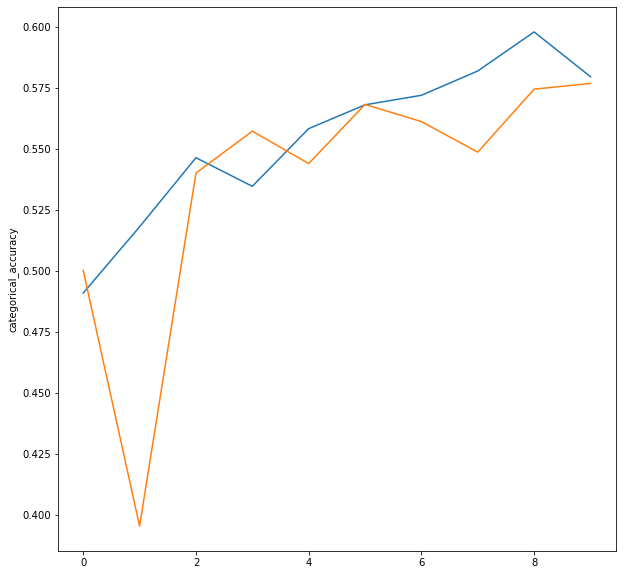

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
_ = pd.DataFrame(history.history)
sns.lineplot(y=_.categorical_accuracy, x=_.index)
sns.lineplot(y=_.val_categorical_accuracy, x=_.index);

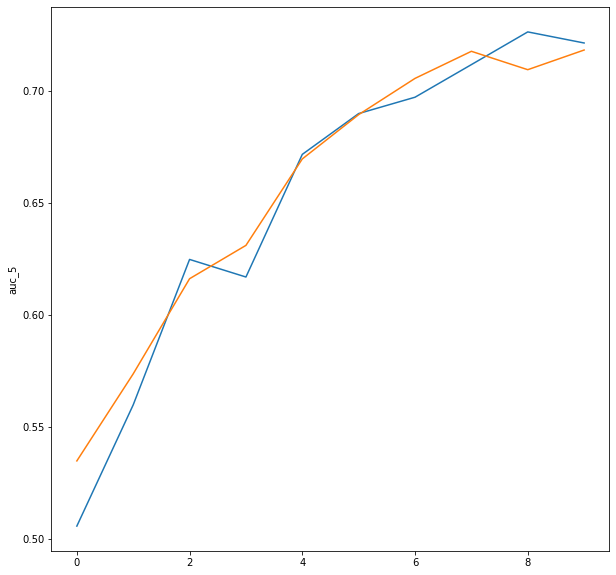

In [95]:
plt.figure(figsize=(10,10))
sns.lineplot(y=_.auc, x=_.index)
sns.lineplot(y=_.val_auc, x=_.index);